- https://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [1]:
import sklearn

sklearn.__version__

'0.22.2.post1'

In [2]:
!pip install -U scikit-learn --user
#!pip3 install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\rvsul\appdata\roaming\python\python37\site-packages (0.22.2.post1)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [5]:
x = np.linspace(0, 2* np.pi, 100)
y = np.sin(x) + .5*np.random.random(100)

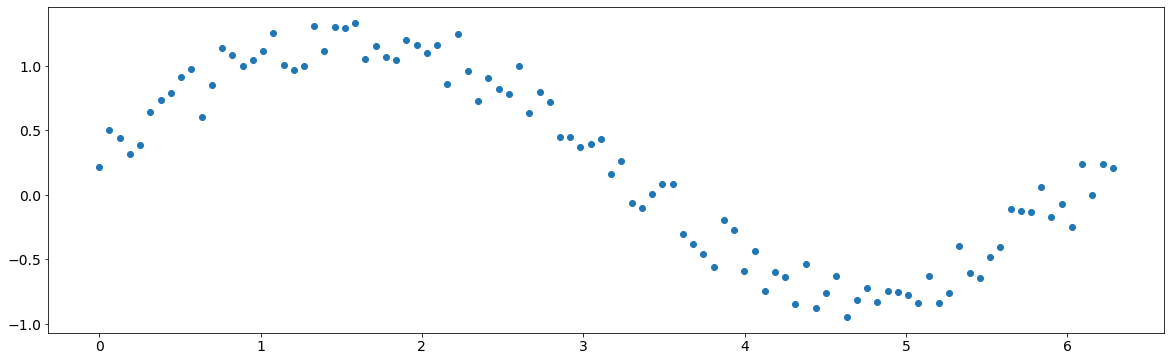

In [6]:
plt.scatter(x, y)

In [7]:
from sklearn import tree

In [8]:
2**16

65536

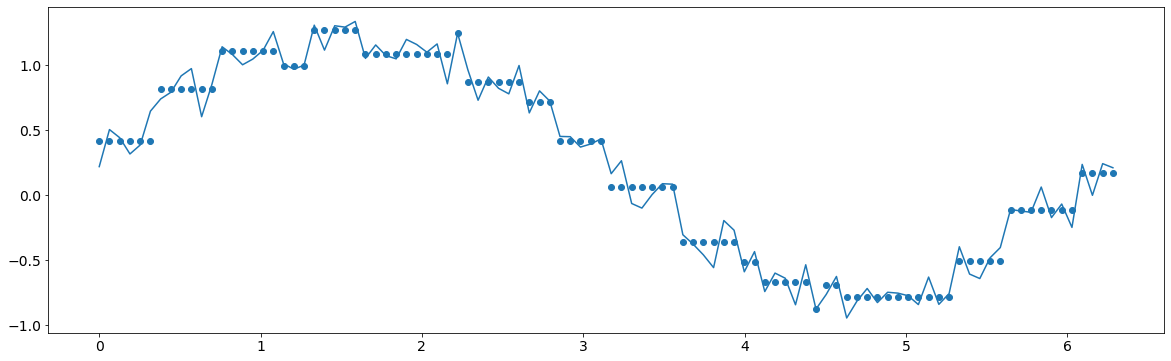

In [9]:
regression = tree.DecisionTreeRegressor(max_depth=8, min_samples_split=8)
regression.fit(x.reshape(-1, 1), y)

yp = regression.predict(x.reshape(-1,1))

plt.scatter(x, yp)
plt.plot(x, y)

In [10]:
regression.predict([[2]])

array([1.08571991])

In [11]:
path = regression.decision_path(x.reshape(-1, 1))

In [12]:
path.todense()

matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1]], dtype=int64)

[Text(589.0, 308.04, 'X[0] <= 3.142\nmse = 0.511\nsamples = 100\nvalue = 0.24'),
 Text(310.0, 271.8, 'X[0] <= 0.349\nmse = 0.09\nsamples = 50\nvalue = 0.874'),
 Text(248.0, 235.56, 'mse = 0.018\nsamples = 6\nvalue = 0.416'),
 Text(372.0, 235.56, 'X[0] <= 2.634\nmse = 0.067\nsamples = 44\nvalue = 0.937'),
 Text(248.0, 199.32000000000002, 'X[0] <= 0.73\nmse = 0.032\nsamples = 36\nvalue = 1.027'),
 Text(186.0, 163.08, 'mse = 0.015\nsamples = 6\nvalue = 0.809'),
 Text(310.0, 163.08, 'X[0] <= 2.253\nmse = 0.024\nsamples = 30\nvalue = 1.071'),
 Text(248.0, 126.84, 'X[0] <= 1.301\nmse = 0.014\nsamples = 24\nvalue = 1.122'),
 Text(124.0, 90.60000000000002, 'X[0] <= 1.111\nmse = 0.007\nsamples = 9\nvalue = 1.066'),
 Text(62.0, 54.360000000000014, 'mse = 0.007\nsamples = 6\nvalue = 1.104'),
 Text(186.0, 54.360000000000014, 'mse = 0.0\nsamples = 3\nvalue = 0.989'),
 Text(372.0, 90.60000000000002, 'X[0] <= 1.618\nmse = 0.015\nsamples = 15\nvalue = 1.156'),
 Text(310.0, 54.360000000000014, 'mse = 0

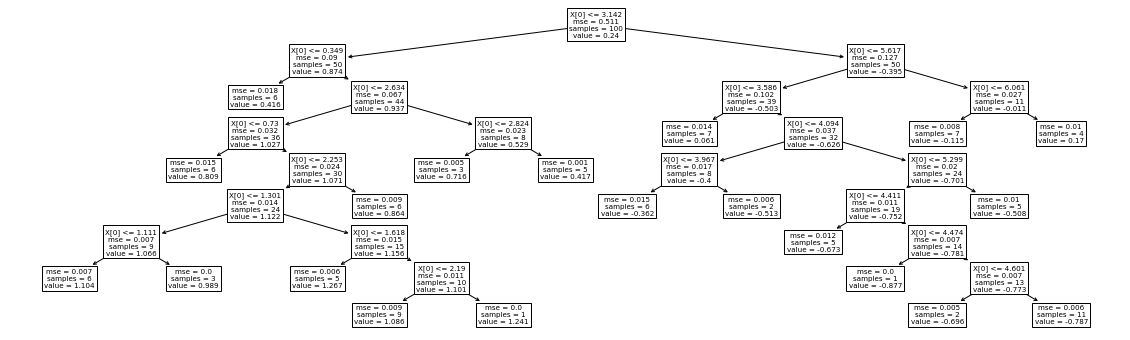

In [13]:
tree.plot_tree(regression)

In [14]:
bikeshare = pd.read_csv('../data/bikeshare_daily_agg.csv', index_col='hour_of_day')

In [15]:
bikeshare

,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


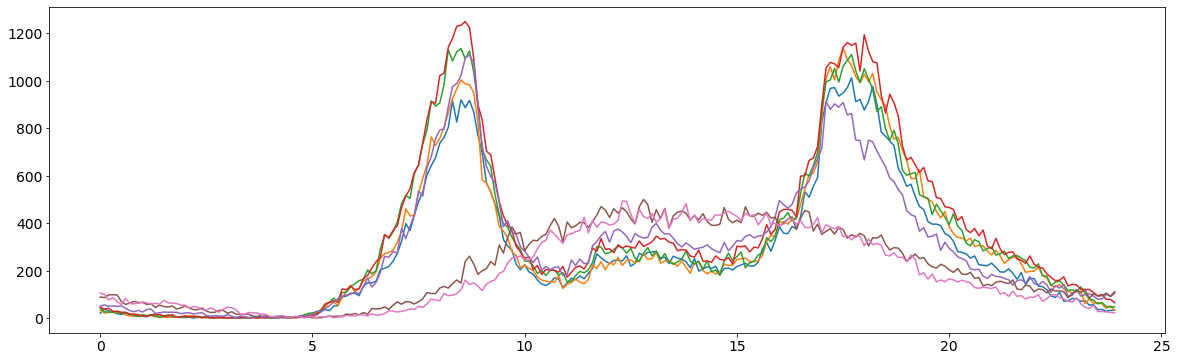

In [16]:
plt.plot(bikeshare)

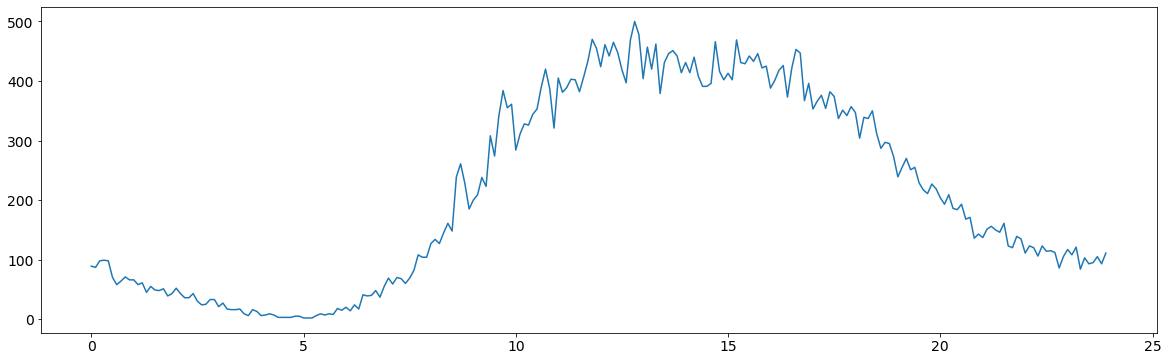

In [17]:
plt.plot(bikeshare['5'])

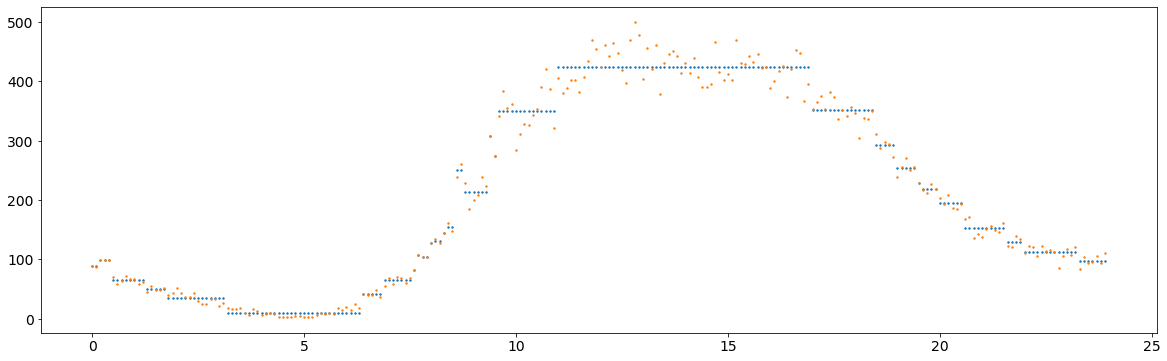

In [18]:
hours = bikeshare.index.values.reshape(-1,1)

bike_reg = tree.DecisionTreeRegressor(max_depth=5)
bike_reg.fit(hours, bikeshare['5'].fillna(0))

bike_pred = bike_reg.predict(hours)

plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, bikeshare['5'], s=2)

# Use the bikeshare dataset (see above) and choose a weekday (0,1,2,3,4).

# 1. Create 5 Decision Tree Regressors using `max_depth=4,5,6,7,8`. For each one of these models, calculate the MSE between the predicted values from the model (`bike_pred`) and the actual values (`bikeshare['n']`). Create a plot showing the predictions along with the actuals. You may also show the `print_tree()` for a sanity check as well.



In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

bikeshare_mon = bikeshare['0']
hours = bikeshare_mon.index.values.reshape(-1,1)

bike_reg4 = DecisionTreeRegressor(max_depth=4)
bike_reg4.fit(hours, bikeshare_mon.fillna(0))

bike_pred4 = bike_reg4.predict(hours)

mean_squared_error(bikeshare_mon.fillna(0), bike_pred4) #MSE

10485.50192299583

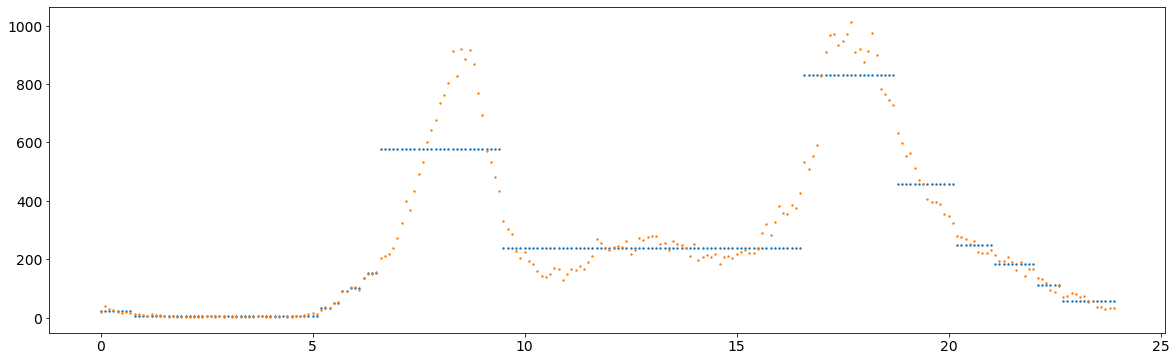

In [20]:
plt.scatter(hours, bike_pred4, s=2)
plt.scatter(hours, bikeshare_mon, s=2)

[Text(558.0, 293.54400000000004, 'X[0] <= 6.55\nmse = 73119.042\nsamples = 240\nvalue = 273.0'),
 Text(279.0, 228.312, 'X[0] <= 5.65\nmse = 1617.322\nsamples = 66\nvalue = 25.636'),
 Text(139.5, 163.08000000000004, 'X[0] <= 5.15\nmse = 152.587\nsamples = 57\nvalue = 10.789'),
 Text(69.75, 97.84800000000001, 'X[0] <= 0.75\nmse = 66.345\nsamples = 52\nvalue = 7.962'),
 Text(34.875, 32.61600000000004, 'mse = 55.984\nsamples = 8\nvalue = 23.625'),
 Text(104.625, 32.61600000000004, 'mse = 15.51\nsamples = 44\nvalue = 5.114'),
 Text(209.25, 97.84800000000001, 'X[0] <= 5.45\nmse = 101.36\nsamples = 5\nvalue = 40.2'),
 Text(174.375, 32.61600000000004, 'mse = 13.556\nsamples = 3\nvalue = 32.333'),
 Text(244.125, 32.61600000000004, 'mse = 1.0\nsamples = 2\nvalue = 52.0'),
 Text(418.5, 163.08000000000004, 'X[0] <= 6.15\nmse = 656.222\nsamples = 9\nvalue = 119.667'),
 Text(348.75, 97.84800000000001, 'X[0] <= 5.85\nmse = 39.04\nsamples = 5\nvalue = 97.6'),
 Text(313.875, 32.61600000000004, 'mse = 2

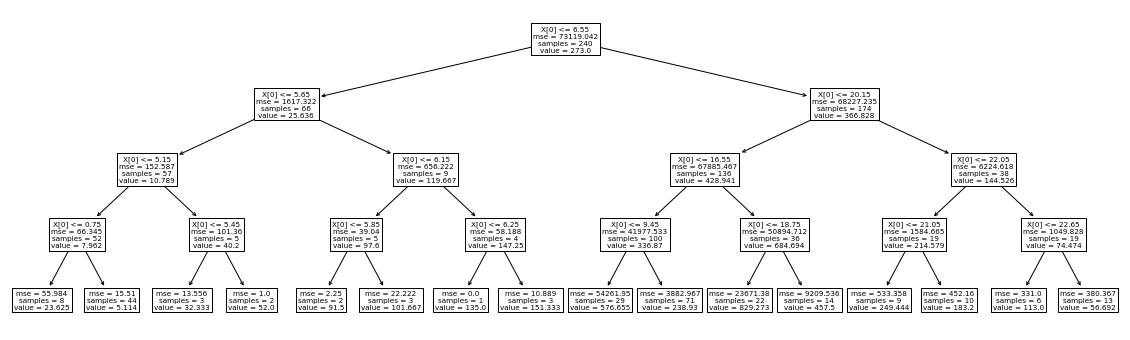

In [21]:
tree.plot_tree(bike_reg4)

In [22]:
bike_reg5 = DecisionTreeRegressor(max_depth=5)
bike_reg5.fit(hours, bikeshare_mon.fillna(0))

bike_pred5 = bike_reg5.predict(hours)

mean_squared_error(bikeshare_mon.fillna(0), bike_pred5) #MSE

3452.6521680267956

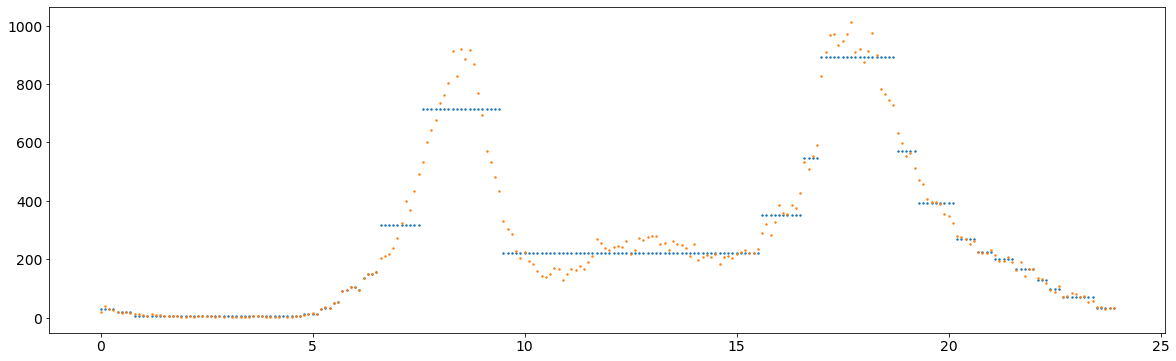

In [23]:
plt.scatter(hours, bike_pred5, s=2)
plt.scatter(hours, bikeshare_mon, s=2)

[Text(551.0250000000001, 298.98, 'X[0] <= 6.55\nmse = 73119.042\nsamples = 240\nvalue = 273.0'),
 Text(283.65000000000003, 244.62, 'X[0] <= 5.65\nmse = 1617.322\nsamples = 66\nvalue = 25.636'),
 Text(148.8, 190.26000000000002, 'X[0] <= 5.15\nmse = 152.587\nsamples = 57\nvalue = 10.789'),
 Text(74.4, 135.9, 'X[0] <= 0.75\nmse = 66.345\nsamples = 52\nvalue = 7.962'),
 Text(37.2, 81.53999999999999, 'X[0] <= 0.35\nmse = 55.984\nsamples = 8\nvalue = 23.625'),
 Text(18.6, 27.180000000000007, 'mse = 44.188\nsamples = 4\nvalue = 29.25'),
 Text(55.800000000000004, 27.180000000000007, 'mse = 4.5\nsamples = 4\nvalue = 18.0'),
 Text(111.60000000000001, 81.53999999999999, 'X[0] <= 4.75\nmse = 15.51\nsamples = 44\nvalue = 5.114'),
 Text(93.0, 27.180000000000007, 'mse = 9.728\nsamples = 40\nvalue = 4.35'),
 Text(130.20000000000002, 27.180000000000007, 'mse = 9.188\nsamples = 4\nvalue = 12.75'),
 Text(223.20000000000002, 135.9, 'X[0] <= 5.45\nmse = 101.36\nsamples = 5\nvalue = 40.2'),
 Text(186.0, 81.

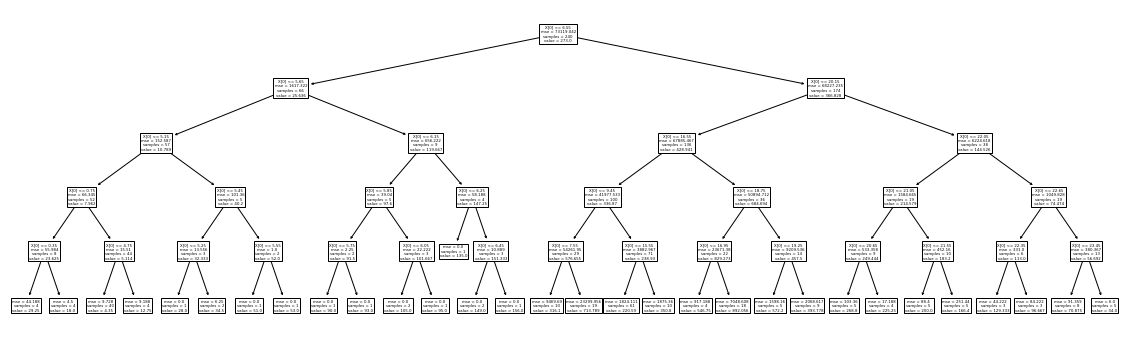

In [24]:
tree.plot_tree(bike_reg5)

In [25]:
bike_reg6 = DecisionTreeRegressor(max_depth=6)
bike_reg6.fit(hours, bikeshare_mon.fillna(0))

bike_pred6 = bike_reg6.predict(hours)

mean_squared_error(bikeshare_mon.fillna(0), bike_pred6) #MSE

1536.1039390470642

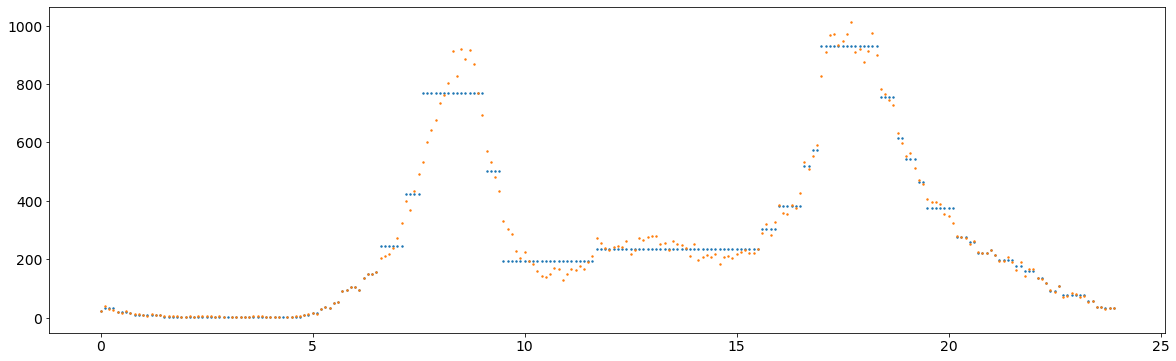

In [26]:
plt.scatter(hours, bike_pred6, s=2)
plt.scatter(hours, bikeshare_mon, s=2)

[Text(498.2142857142857, 302.86285714285714, 'X[0] <= 6.55\nmse = 73119.042\nsamples = 240\nvalue = 273.0'),
 Text(244.83673469387756, 256.2685714285715, 'X[0] <= 5.65\nmse = 1617.322\nsamples = 66\nvalue = 25.636'),
 Text(153.73469387755102, 209.67428571428573, 'X[0] <= 5.15\nmse = 152.587\nsamples = 57\nvalue = 10.789'),
 Text(91.10204081632654, 163.08, 'X[0] <= 0.75\nmse = 66.345\nsamples = 52\nvalue = 7.962'),
 Text(45.55102040816327, 116.4857142857143, 'X[0] <= 0.35\nmse = 55.984\nsamples = 8\nvalue = 23.625'),
 Text(22.775510204081634, 69.89142857142855, 'X[0] <= 0.05\nmse = 44.188\nsamples = 4\nvalue = 29.25'),
 Text(11.387755102040817, 23.297142857142887, 'mse = 0.0\nsamples = 1\nvalue = 21.0'),
 Text(34.163265306122454, 23.297142857142887, 'mse = 28.667\nsamples = 3\nvalue = 32.0'),
 Text(68.32653061224491, 69.89142857142855, 'X[0] <= 0.65\nmse = 4.5\nsamples = 4\nvalue = 18.0'),
 Text(56.93877551020408, 23.297142857142887, 'mse = 4.222\nsamples = 3\nvalue = 18.667'),
 Text(79

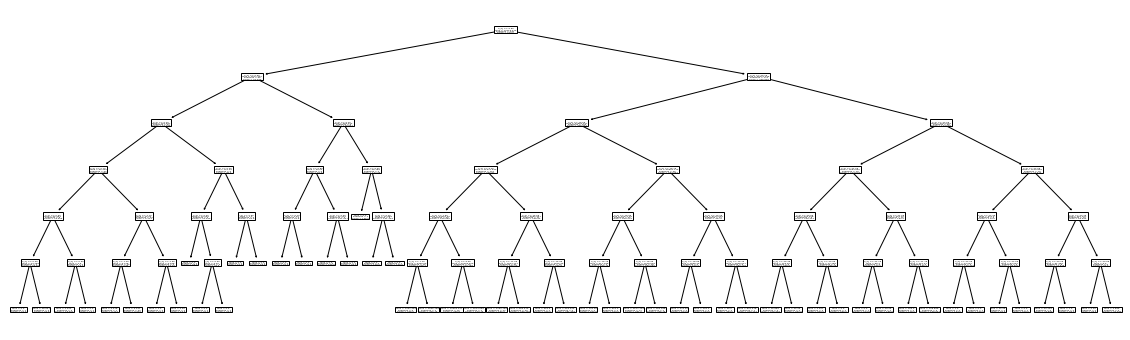

In [27]:
tree.plot_tree(bike_reg6)

In [28]:
bike_reg7 = DecisionTreeRegressor(max_depth=7)
bike_reg7.fit(hours, bikeshare_mon.fillna(0))

bike_pred7 = bike_reg7.predict(hours)

mean_squared_error(bikeshare_mon.fillna(0), bike_pred7) #MSE

530.0101716049259

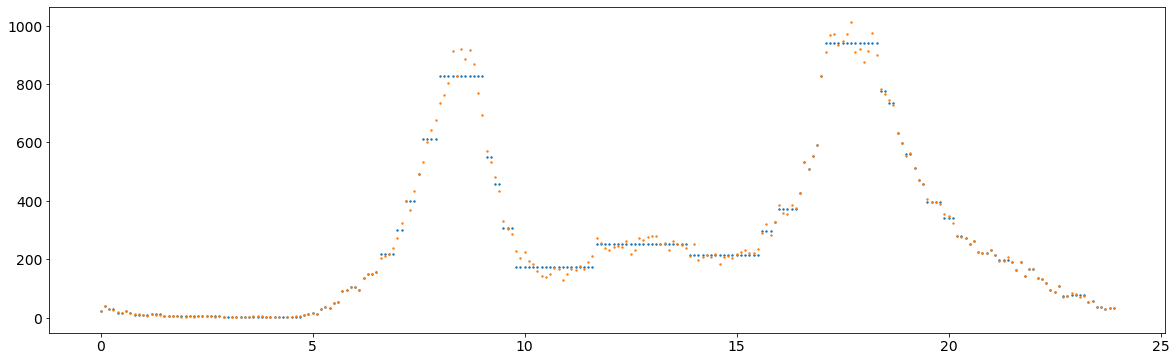

In [29]:
plt.scatter(hours, bike_pred7, s=2)
plt.scatter(hours, bikeshare_mon, s=2)

[Text(466.0568181818182, 305.77500000000003, 'X[0] <= 6.55\nmse = 73119.042\nsamples = 240\nvalue = 273.0'),
 Text(204.72077922077924, 265.005, 'X[0] <= 5.65\nmse = 1617.322\nsamples = 66\nvalue = 25.636'),
 Text(137.6883116883117, 224.235, 'X[0] <= 5.15\nmse = 152.587\nsamples = 57\nvalue = 10.789'),
 Text(79.71428571428572, 183.465, 'X[0] <= 0.75\nmse = 66.345\nsamples = 52\nvalue = 7.962'),
 Text(36.23376623376623, 142.69500000000002, 'X[0] <= 0.35\nmse = 55.984\nsamples = 8\nvalue = 23.625'),
 Text(14.493506493506494, 101.92500000000001, 'X[0] <= 0.05\nmse = 44.188\nsamples = 4\nvalue = 29.25'),
 Text(7.246753246753247, 61.15500000000003, 'mse = 0.0\nsamples = 1\nvalue = 21.0'),
 Text(21.74025974025974, 61.15500000000003, 'X[0] <= 0.15\nmse = 28.667\nsamples = 3\nvalue = 32.0'),
 Text(14.493506493506494, 20.38499999999999, 'mse = 0.0\nsamples = 1\nvalue = 39.0'),
 Text(28.98701298701299, 20.38499999999999, 'mse = 6.25\nsamples = 2\nvalue = 28.5'),
 Text(57.97402597402598, 101.92500

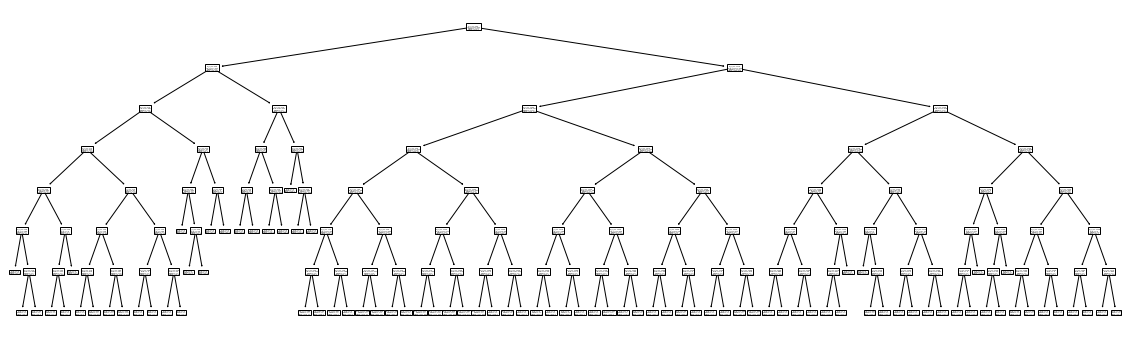

In [30]:
tree.plot_tree(bike_reg7)

In [31]:
bike_reg8 = DecisionTreeRegressor(max_depth=8)
bike_reg8.fit(hours, bikeshare_mon.fillna(0))

bike_pred8 = bike_reg8.predict(hours)

mean_squared_error(bikeshare_mon.fillna(0), bike_pred8) #MSE

303.154213022816

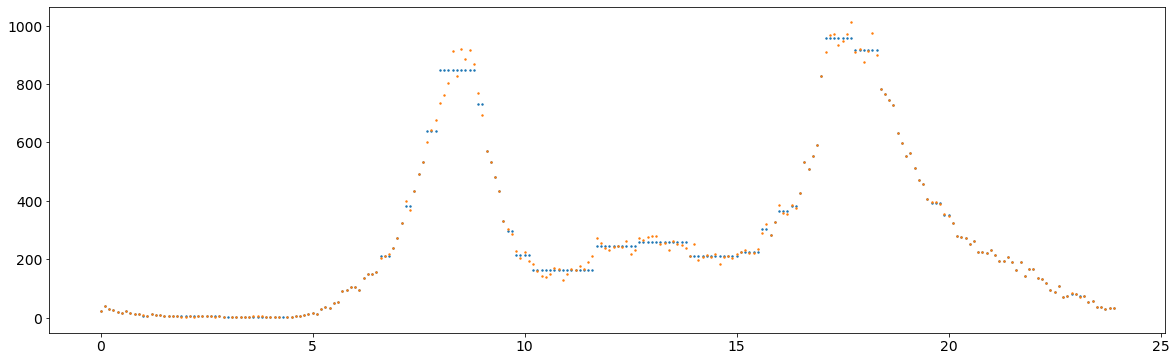

In [32]:
plt.scatter(hours, bike_pred8, s=2)
plt.scatter(hours, bikeshare_mon, s=2)

[Text(479.46259842519686, 308.04, 'X[0] <= 6.55\nmse = 73119.042\nsamples = 240\nvalue = 273.0'),
 Text(206.13779527559055, 271.8, 'X[0] <= 5.65\nmse = 1617.322\nsamples = 66\nvalue = 25.636'),
 Text(145.7244094488189, 235.56, 'X[0] <= 5.15\nmse = 152.587\nsamples = 57\nvalue = 10.789'),
 Text(86.40944881889764, 199.32000000000002, 'X[0] <= 0.75\nmse = 66.345\nsamples = 52\nvalue = 7.962'),
 Text(35.1496062992126, 163.08, 'X[0] <= 0.35\nmse = 55.984\nsamples = 8\nvalue = 23.625'),
 Text(11.716535433070867, 126.84, 'X[0] <= 0.05\nmse = 44.188\nsamples = 4\nvalue = 29.25'),
 Text(5.858267716535433, 90.60000000000002, 'mse = 0.0\nsamples = 1\nvalue = 21.0'),
 Text(17.5748031496063, 90.60000000000002, 'X[0] <= 0.15\nmse = 28.667\nsamples = 3\nvalue = 32.0'),
 Text(11.716535433070867, 54.360000000000014, 'mse = 0.0\nsamples = 1\nvalue = 39.0'),
 Text(23.433070866141733, 54.360000000000014, 'X[0] <= 0.25\nmse = 6.25\nsamples = 2\nvalue = 28.5'),
 Text(17.5748031496063, 18.120000000000005, 'm

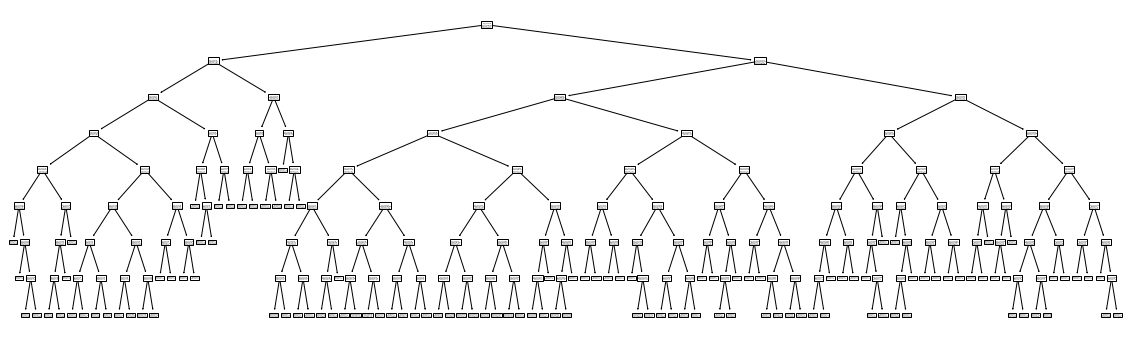

In [33]:
tree.plot_tree(bike_reg8)

# 2. Using the 5 models created with various `max_depth` values, calculate the MSE between the predicted values (`bike_pred`) and values from all of the weekdays [`0,1,2,3,4`]. You should have 25 total MSE values, 5 values for each `max_depth`. 

In [58]:
# Max depth = 4
for day in ('0', '1', '2', '3', '4'):
    MSE = mean_squared_error(bikeshare[day].fillna(0), bike_pred4)
    print(MSE)


10485.50192299583
14152.952163164873
18453.529945073493
27078.6525243137
17006.74773251425


In [54]:
# Max depth = 5
for day in ('0', '1', '2', '3', '4'):
    MSE = mean_squared_error(bikeshare[day].fillna(0), bike_pred5)
    print(MSE)



3452.6521680267956
6542.337660489167
10658.640131588934
17196.7518111179
10302.018420962755


In [55]:
# Max depth = 6
for day in ('0', '1', '2', '3', '4'):
    MSE = mean_squared_error(bikeshare[day].fillna(0), bike_pred6)
    print(MSE)



1536.1039390470642
4110.620298520924
7636.5015719696985
13957.005780677659
8084.686056512932


In [59]:
# Max depth = 7
for day in ('0', '1', '2', '3', '4'):
    MSE = mean_squared_error(bikeshare[day].fillna(0), bike_pred7)
    print(MSE)


530.0101716049259
3102.2668652385196
6543.280159101519
12443.479312689591
6626.382620318063


In [60]:
# Max depth = 8
for day in ('0', '1', '2', '3', '4'):
    MSE = mean_squared_error(bikeshare[day].fillna(0), bike_pred8)
    print(MSE)
    

303.154213022816
2673.256744894539
6038.400676129425
11924.415399758194
6094.183507894611


# 3. (2 cont'd) Describe which max_depth you would recommend based on the groups of MSE values. Use the idea of generality of the model for your argument along with the MSE values as proof.

Considering the trade-off between accuracy (lowest MSE) and generalizability (applicability across days of the week), I would recommend max_depth = 8. Although this is the lowest-level decision tree of those tested for the Monday data, bringing the potential for overfitting, it also happens to be the model with the lowest MSE across the data for the other days of the week. One might think that a decision tree model with 8 levels based on Monday data would be too specific (over-fit) to the data that it was built on, making it a poor model for other data (similar to overfitting a model on training data so that it performs poorly on test data). However, the 8-level model also performs for the rest of the weekday data than the other depths. For instance, the MSE will obviously be lowest for Monday data when max_depth = 8 with a value of 303.15. But this pattern also persists for Friday, as an example. Using Friday to illustrate, depth = 4 returns an MSE of 17,006.75. As depth increases, MSE steadily decreases until depth = 8 returns an MSE of 6,094.18. Although the MSE is significantly lower for Monday data across all values of depth, the fact remains that MSE for all other days decreases as depth increases. This is likely because the bikeshare data shares a similar pattern each weekday, only really diverging on the weekends. As a result, the Monday-based model is a reasonable fit for the rest of the work week. 